In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y = []
for x in ['siramcerah.csv','mengeringcerah.csv','sirammendung.csv','mengeringmendung.csv']:
    y.append(pd.read_csv(x))
df = pd.concat(y)

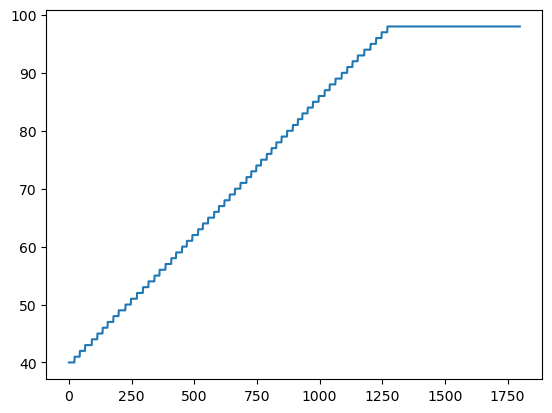

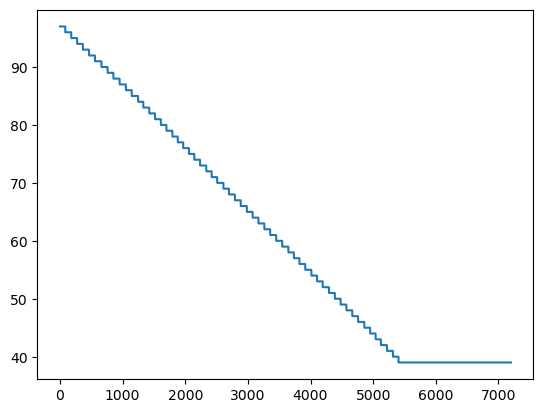

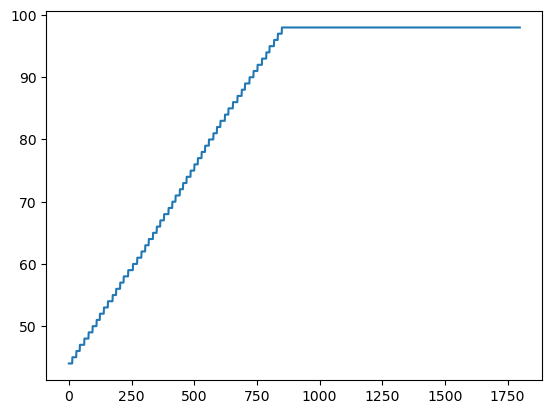

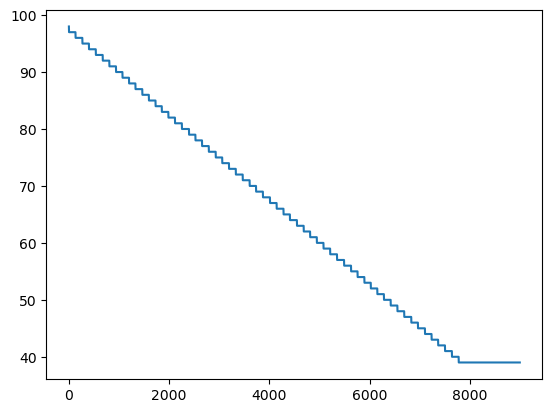

In [3]:
for i in y:
    plt.figure()
    i['humidity'].plot()

In [20]:
y[0].columns

Index(['Unnamed: 0', 'date', 'humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light', 'status'],
      dtype='object')

<Axes: >

<Figure size 640x480 with 0 Axes>

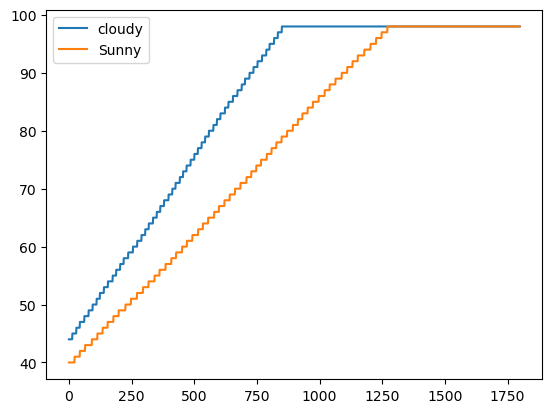

In [19]:
k = []
for i in range(0,len(y[2].values)):
    k.append([y[2]['humidity'].values[i],y[0]['humidity'].values[i]])
plt.figure()
dfk = pd.DataFrame(k, columns=['cloudy','Sunny'])
dfk.plot()

<Axes: >

<Figure size 640x480 with 0 Axes>

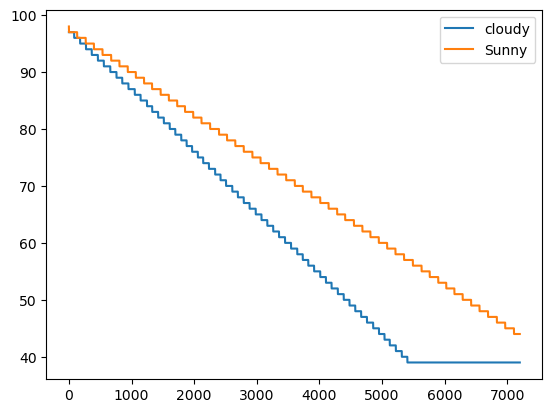

In [22]:
k = []
for i in range(0,len(y[1].values)):
    k.append([y[1]['humidity'].values[i],y[3]['humidity'].values[i]])
plt.figure()
dfk = pd.DataFrame(k, columns=['cloudy','Sunny'])
dfk.plot()

In [ ]:
df.describe()

In [3]:
yd =[]
for xd in y:
    yd.append(xd[['humidity','temperature',
                'ambient humidity','ambient temperature',
                  'light']].diff().fillna(0))
dfdiff = pd.concat(yd)

In [ ]:
df['status'].unique()

In [ ]:
dfdiff.describe()

In [ ]:
print(df.columns)

In [ ]:
data = df[['humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light']].to_numpy()

In [ ]:
label = df['status'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.10, random_state=42)

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_x,train_y)

In [ ]:
pred_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

In [ ]:
datad = dfdiff[['humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light']].to_numpy()

In [ ]:
labeld = df['status'].to_numpy()

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(datad, labeld, test_size=0.10, random_state=42)

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(train_x,train_y)

In [ ]:
pred_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

X = df[['humidity','temperature']].to_numpy()
y = df['status'].map({'siram': 0,
                      'mengering': 1})
    
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

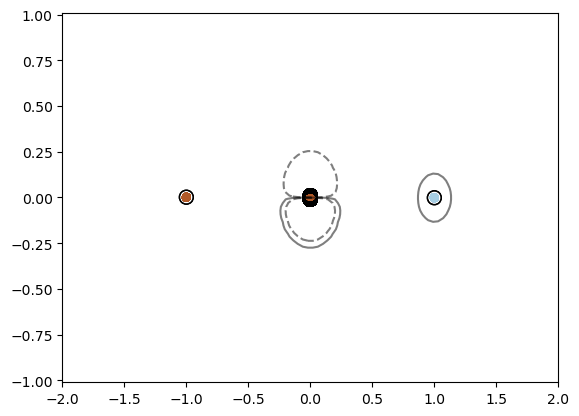

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

X = dfdiff[['humidity','temperature']].to_numpy()
y = df['status'].map({'siram': 0,
                      'mengering': 1})
    
clf = svm.SVC()
clf.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()